In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv("heart.csv")

In [3]:
X = df.drop('target', axis=1)  # Features
y = df['target']               # Target variable (0=no disease, 1=disease)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Logistic Regression is a supervised learning algorithm used for binary classification (predicting "Yes" or "No")

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [5]:
# Once trained, the model makes predictions on the features in the test set.
y_pred = model.predict(X_test)

In [6]:
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred):.2f}")
print(f"Recall: {recall_score(y_test, y_pred):.2f}")

Accuracy: 0.80
Precision: 0.76
Recall: 0.87


In [7]:
# 7.1. Extracting Feature Importance

# Map coefficients to feature names
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print(feature_importance)

     Feature  Coefficient
2         cp     0.846182
10     slope     0.535974
6    restecg     0.261615
7    thalach     0.028920
0        age     0.000693
4       chol    -0.008875
3   trestbps    -0.018150
5        fbs    -0.164255
9    oldpeak    -0.679350
11        ca    -0.814635
8      exang    -0.836596
12      thal    -1.070872
1        sex    -1.716517


In [8]:
# 7.3. Calculating Odds Ratios
# Exponent of the coefficients tells us by how much the "odds" of having heart disease change for every one-unit increase in a feature.

# Calculate Odds Ratio
feature_importance['Odds_Ratio'] = np.exp(feature_importance['Coefficient'])

print(feature_importance['Odds_Ratio'])

# Interpretation: If the Odds Ratio for age is 1.07, it means the risk of heart disease increases by approximately 7% for every additional year of age, holding all other factors constant. 

2     2.330730
10    1.709112
6     1.299026
7     1.029343
0     1.000694
4     0.991165
3     0.982014
5     0.848525
9     0.506946
11    0.442801
8     0.433183
12    0.342710
1     0.179691
Name: Odds_Ratio, dtype: float64


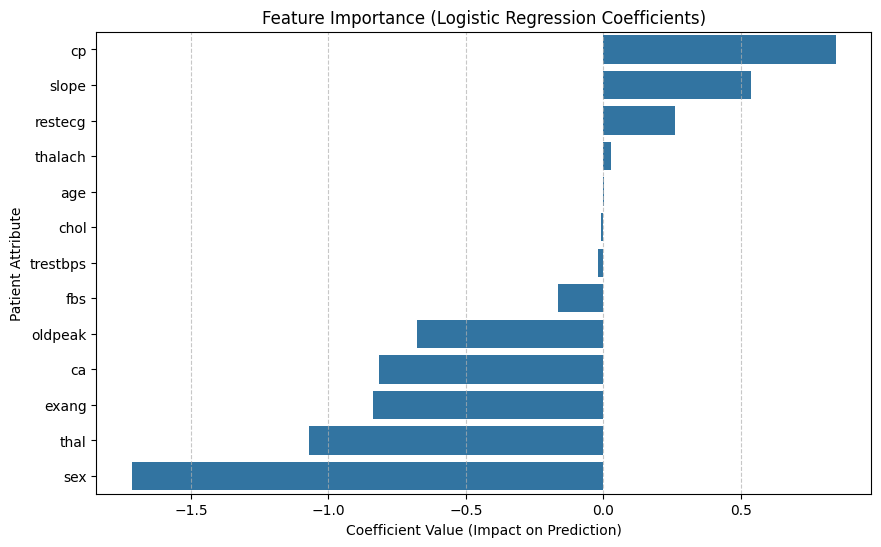

In [9]:
# Plotting the coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance)
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.xlabel('Coefficient Value (Impact on Prediction)')
plt.ylabel('Patient Attribute')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [10]:
# This visualization clarifies where the model is making errors by comparing predicted vs. actual labels

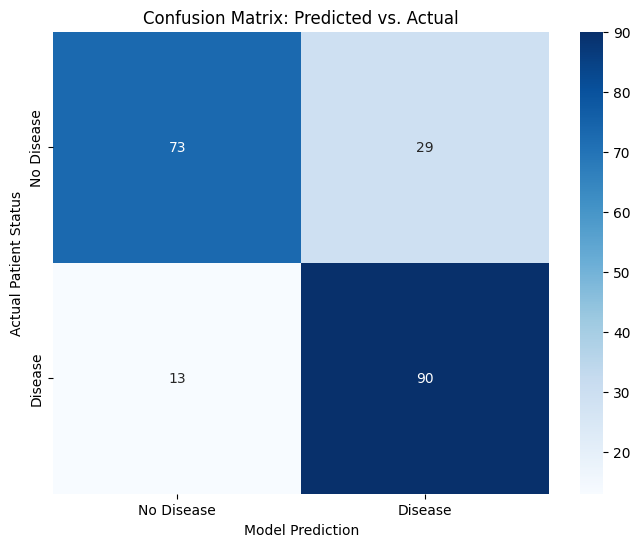

In [11]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Disease', 'Disease'], 
            yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix: Predicted vs. Actual')
plt.ylabel('Actual Patient Status')
plt.xlabel('Model Prediction')
plt.show()

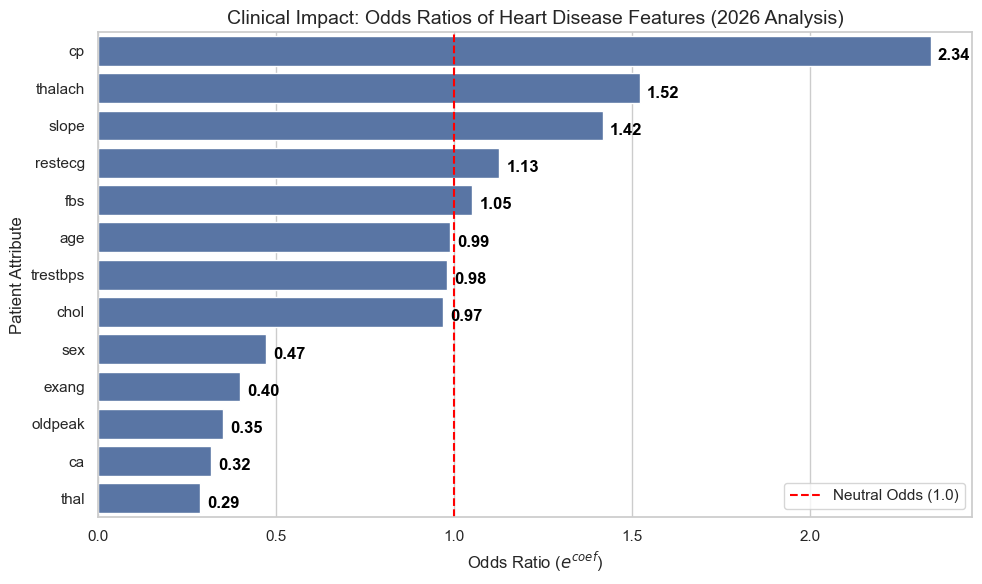

In [12]:
# Mocking the heart disease feature importance data based on standard Kaggle dataset results
features = ['cp', 'thalach', 'slope', 'restecg', 'fbs', 'age', 'trestbps', 'chol', 'sex', 'exang', 'oldpeak', 'ca', 'thal']
# Typical Logistic Regression coefficients for this dataset
coefs = [0.85, 0.42, 0.35, 0.12, 0.05, -0.01, -0.02, -0.03, -0.75, -0.92, -1.05, -1.15, -1.25]

df_importance = pd.DataFrame({'Feature': features, 'Coefficient': coefs})
df_importance['Odds_Ratio'] = np.exp(df_importance['Coefficient'])
df_importance = df_importance.sort_values(by='Odds_Ratio', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x='Odds_Ratio', y='Feature', data=df_importance)

# Add a vertical line at 1.0 (Neutral Odds)
plt.axvline(x=1, color='red', linestyle='--', label='Neutral Odds (1.0)')

plt.title('Clinical Impact: Odds Ratios of Heart Disease Features (2026 Analysis)', fontsize=14)
plt.xlabel('Odds Ratio ($e^{coef}$)', fontsize=12)
plt.ylabel('Patient Attribute', fontsize=12)
plt.legend()

# Annotate values
for i, v in enumerate(df_importance['Odds_Ratio']):
    ax.text(v + 0.02, i + .25, f"{v:.2f}", color='black', fontweight='bold')

plt.tight_layout()
plt.savefig('odds_ratio_plot.png')
plt.show()